In [1]:
# Created 7/6/21
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, chisquare, chi2, linregress, chi2_contingency, pearsonr
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DATA/avgsV1/avgs2019-20.csv', index_col=0)
df = df[df['NEXT_GAME_ID'] != 0]

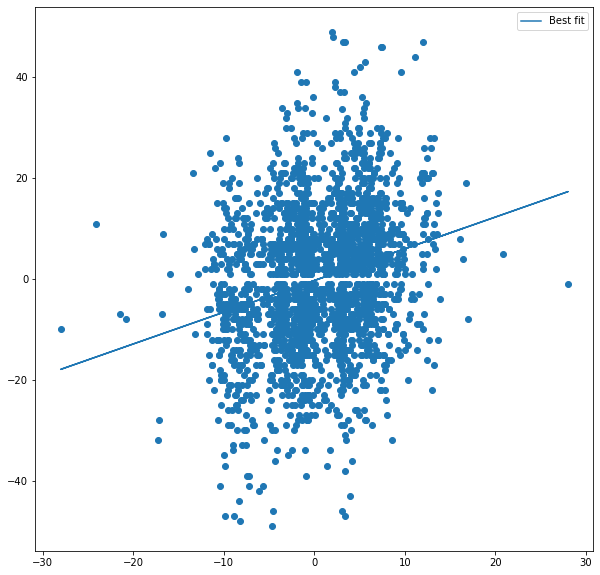

In [3]:
x = df['E_NET_RATING']
y = df['NEXT_PLUS_MINUS']

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)

slope, intercept, rval, pval, stderr = linregress(x, y)
plt.plot(x, intercept+slope*x, label="Best fit")
# plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [4]:
print(f"slope = {slope}\nIntercept = {intercept}\nR = {rval}\nr^2 = {rval**2}\np_val={pval}")

slope = 0.6294692943107688
Intercept = -0.2978743567208068
R = 0.25490099932842986
r^2 = 0.0649745194586322
p_val=9.198277761795893e-35


In [5]:
dl = ['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'E_TM_TOV_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT',
       'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'FTA_RATE',
       'OPP_EFG_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT',
       'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'BLKA', 'PFD', 'PCT_FGA_2PT', 'PCT_FGA_3PT', 'PCT_PTS_2PT',
       'PCT_PTS_2PT_MR', 'PCT_PTS_3PT', 'PCT_PTS_FB', 'PCT_PTS_FT',
       'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT', 'PCT_AST_2PM', 'PCT_UAST_2PM',
       'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM']

In [6]:
res_d = {}
mrval = 0
for i in dl:
    tx = df[i]
    slope, intercept, rval, pval, stderr = linregress(tx, y)
    res_d[i] = rval
    if rval > mrval:
        mind = i
        mrval = rval
mind
    
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


'NET_RATING'

(array([ 4.,  3.,  2.,  8., 18., 16.,  5., 10.,  2.,  3.]),
 array([-0.21826438, -0.17063403, -0.12300368, -0.07537334, -0.02774299,
         0.01988736,  0.06751771,  0.11514805,  0.1627784 ,  0.21040875,
         0.2580391 ]),
 <BarContainer object of 10 artists>)

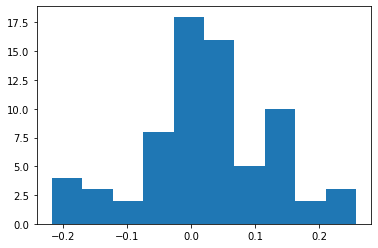

In [7]:
plt.hist(list(res_d.values()))

In [8]:
pd.Series(res_d.values()).describe()

count    71.000000
mean      0.022799
std       0.103329
min      -0.218264
25%      -0.021743
50%       0.020161
75%       0.080078
max       0.258039
dtype: float64

In [9]:
for key in res_d.keys():
    if res_d[key] > 0.1:
        print(key)

PTS
FG_PCT
DREB
REB
BLK
E_OFF_RATING
OFF_RATING
E_NET_RATING
NET_RATING
DREB_PCT
REB_PCT
EFG_PCT
TS_PCT
PIE
PTS_FB
PCT_PTS_FB


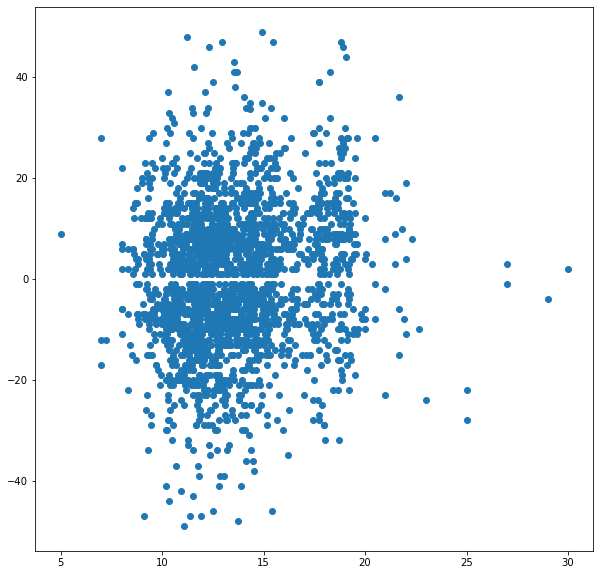

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['PTS_FB'], y)

In [16]:
res_dp = {}
mpval = 0
for i in dl:
    tx = df[i]
    pval = pearsonr(tx, y)[0]
    res_dp[i] = pval
    if pval > mpval:
        mpind = i
        mpval = pval
mpind

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


'NET_RATING'

In [17]:
res_dp

{'PTS': 0.12175483004244911,
 'FGM': 0.09898601107132524,
 'FGA': -0.003139658052132484,
 'FG_PCT': 0.11763420035479522,
 'FG3M': 0.0711073632786666,
 'FG3A': 0.05694687017733478,
 'FG3_PCT': 0.042443859620195076,
 'FTM': 0.05840837183148497,
 'FTA': 0.055402096876309356,
 'FT_PCT': 0.019778676233268445,
 'OREB': -0.06045232109227179,
 'DREB': 0.2039110760529188,
 'REB': 0.17015114692047817,
 'AST': 0.045909143440983215,
 'STL': -0.010057628846635793,
 'BLK': 0.14164813772629842,
 'TOV': -0.0645933630718165,
 'PF': 0.020160814709693702,
 'E_OFF_RATING': 0.14061270659381894,
 'OFF_RATING': 0.13607395645333292,
 'E_DEF_RATING': -0.2182643807364823,
 'DEF_RATING': -0.2178115807457529,
 'E_NET_RATING': 0.2549009993284302,
 'NET_RATING': 0.2580390984264921,
 'AST_PCT': -0.0056027009176981245,
 'AST_TOV': 0.06550065386515999,
 'AST_RATIO': 0.04819083451048754,
 'OREB_PCT': -0.04937797110666496,
 'DREB_PCT': 0.11866336724048786,
 'REB_PCT': 0.13106217957694016,
 'E_TM_TOV_PCT': -0.06492513589

In [18]:
pd.Series(res_dp.values()).describe()

count    70.000000
mean      0.023125
std       0.104038
min      -0.218264
25%      -0.021874
50%       0.021246
75%       0.083997
max       0.258039
dtype: float64

In [19]:
for key in res_dp.keys():
    if res_dp[key] > 0.1:
        print(key)

PTS
FG_PCT
DREB
REB
BLK
E_OFF_RATING
OFF_RATING
E_NET_RATING
NET_RATING
DREB_PCT
REB_PCT
EFG_PCT
TS_PCT
PIE
PTS_FB
PCT_PTS_FB
